In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

red_wine['category'] = 'red'
white_wine['category'] = 'white'

In [34]:
total_wine = pd.concat([red_wine, white_wine]).reset_index()
total_wine = total_wine.drop('index', axis=1)

In [35]:
total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [36]:
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [38]:
quality = total_wine['quality']
quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

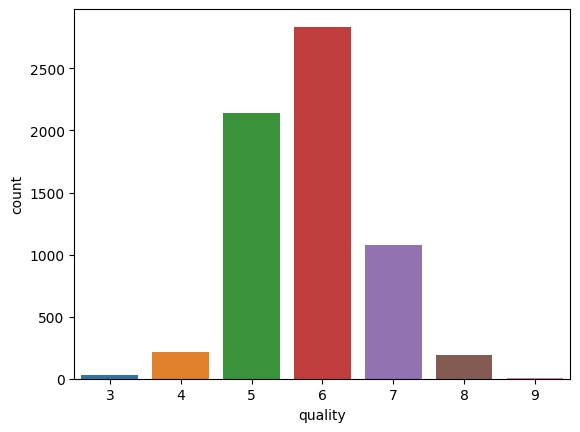

In [42]:
plt.figure()
sns.countplot(total_wine, x=quality)
plt.show()

# 상관관계

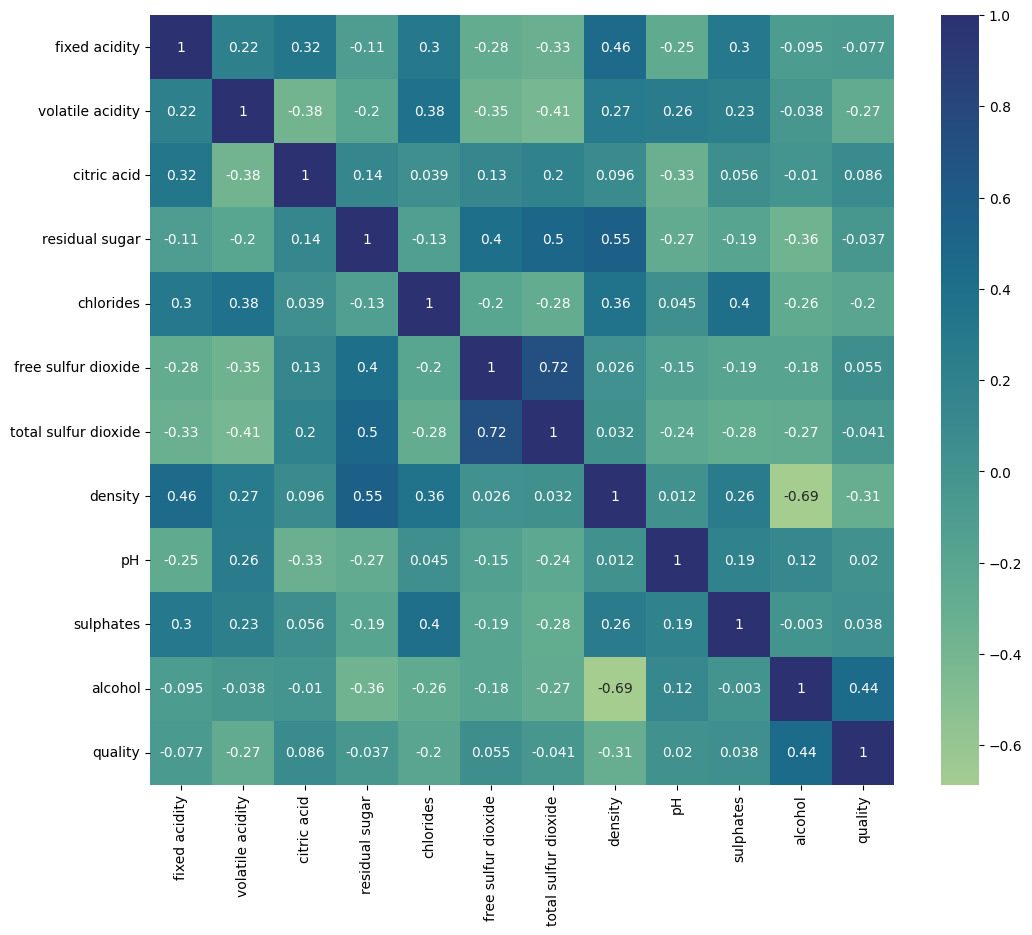

In [57]:
plt.figure(figsize=(12,10))
total_wine.corr(numeric_only=True)
sns.heatmap(total_wine.corr(numeric_only=True), annot=True, cmap='crest')
plt.show()

In [58]:
pd.set_option('display.max_rows', None)
total_wine.corr(numeric_only=True).unstack().abs().sort_values(ascending=False)

fixed acidity         fixed acidity           1.000000
volatile acidity      volatile acidity        1.000000
alcohol               alcohol                 1.000000
sulphates             sulphates               1.000000
pH                    pH                      1.000000
density               density                 1.000000
total sulfur dioxide  total sulfur dioxide    1.000000
free sulfur dioxide   free sulfur dioxide     1.000000
chlorides             chlorides               1.000000
residual sugar        residual sugar          1.000000
citric acid           citric acid             1.000000
quality               quality                 1.000000
free sulfur dioxide   total sulfur dioxide    0.720934
total sulfur dioxide  free sulfur dioxide     0.720934
alcohol               density                 0.686745
density               alcohol                 0.686745
                      residual sugar          0.552517
residual sugar        density                 0.552517
total sulf

In [60]:
pd.reset_option('display.max_rows')

# 상관관계 그래프 relplot

<Figure size 1200x600 with 0 Axes>

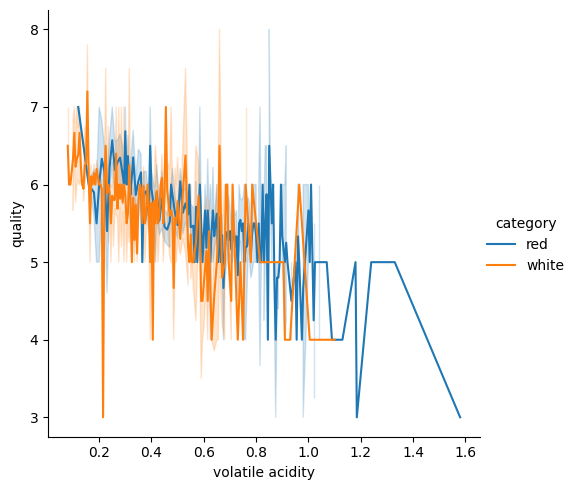

In [65]:
plt.figure(figsize=(12,6))
sns.relplot(total_wine, x='volatile acidity', y='quality', kind='line', hue='category')

<Figure size 1200x600 with 0 Axes>

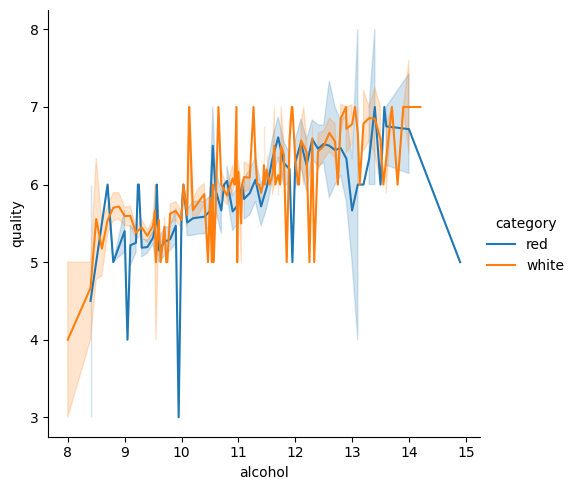

In [71]:
plt.figure(figsize=(12,6))
sns.relplot(total_wine, x='alcohol', y='quality', kind='line',hue='category')

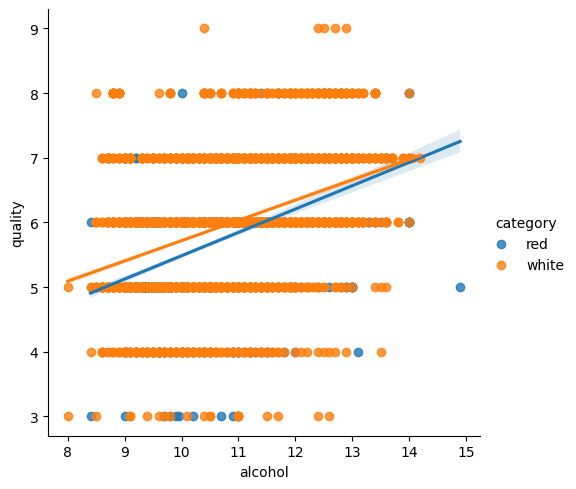

In [68]:
sns.lmplot(total_wine, x='alcohol', y='quality', hue='category')

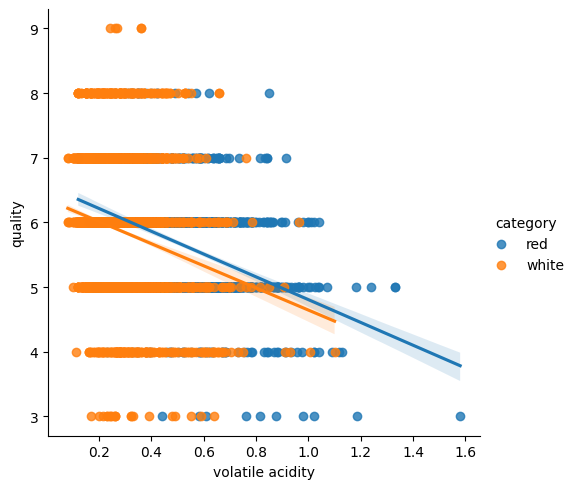

In [69]:
sns.lmplot(total_wine, x='volatile acidity', y='quality', hue='category')